In [1]:

import sys
import os
import scanpy as sc
project_path = "/home/lixiangyu/multi-omics/MOMG"
sys.path.append(project_path)

from package import DMG, clustering

/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)


cpu


In [24]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27me3/H3K27me3_cluster15_21.h5ad'
adata=sc.read(adata_file)
print(adata)

AnnData object with n_obs × n_vars = 9732 × 18165
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27me3', 'nFeature_H3K27me3', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27me3_clusters', 'n_genes', 'mclust', 'SpatialGlue_15', 'SpatialGlue_16', 'SpatialGlue_17', 'SpatialGlue_18', 'SpatialGlue_19', 'SpatialGlue_20', 'SpatialGlue_21', 'MISO_rp_15', 'MISO_rp_16', 'MISO_rp_17', 'MISO_rp_18', 'MISO_rp_19', 'MISO_rp_20', 'MISO_rp_21', 'no_image', 'RNA', 'ATAC'
    var: 'name', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'ATAC_colors', 'MISO_rp_18_colors', 'RNA_cluster_colors', 'RNA_colors', 'SpatialGlue_18_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors', 'resnet_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_lsi', 'X_pca', 'X_umap', 'adj_feature', 'alpha', 'alpha_omics

In [2]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27me3/'
adata_omics1 = sc.read_h5ad(file_fold + 'rna_clean.h5ad')
print(adata_omics1)
import anndata
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
from rpy2.robjects.conversion import localconverter

# 加载R包
mclust = importr("mclust")

# 假设 X_pca 是降维后的数据（例如PCA坐标）
X_pca = adata_omics1.obsm["X_pca"][:, :40]  # 使用前20个主成分

# 转换为R矩阵
with localconverter(ro.default_converter + numpy2ri.converter):
    r_X_pca = ro.r.matrix(X_pca, nrow=X_pca.shape[0], ncol=X_pca.shape[1])

# 指定聚类数（例如强制分8类）
mclust_result = mclust.Mclust(r_X_pca, G=18)

clusters = np.array(mclust_result.rx2("classification"))
adata_omics1.obs["mclust_clusters"] = clusters.astype(int)
adata_omics1.obs["mclust_clusters"] = adata_omics1.obs["mclust_clusters"].astype('category')

AnnData object with n_obs × n_vars = 9732 × 18165
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27me3', 'nFeature_H3K27me3', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27me3_clusters', 'n_genes'
    var: 'name', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p'
    obsm: 'X_lsi', 'X_pca', 'X_umap', 'feat', 'spatial'


In [3]:
adata.obs['RNA']=adata_omics1.obs['mclust_clusters']

In [4]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(0)
sc.settings.seed = 0
# 加载数据
file_fold = '/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27me3/'
adata_omics2 = sc.read_h5ad(file_fold + 'atac_clean.h5ad')
print(adata_omics2)
import anndata
import numpy as np
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import numpy2ri
from rpy2.robjects.conversion import localconverter

mclust = importr("mclust")
X_pca = adata_omics2.obsm["X_pca"][:, :40]  

with localconverter(ro.default_converter + numpy2ri.converter):
  r_X_pca = ro.r.matrix(X_pca, nrow=X_pca.shape[0], ncol=X_pca.shape[1])

mclust_result = mclust.Mclust(r_X_pca, G=18)
clusters = np.array(mclust_result.rx2("classification"))
adata_omics2.obs["mclust_clusters"] = clusters.astype(int)
adata_omics2.obs["mclust_clusters"] = adata_omics2.obs["mclust_clusters"].astype('category')

AnnData object with n_obs × n_vars = 9732 × 70470
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27me3', 'nFeature_H3K27me3', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27me3_clusters'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable', 'count', 'percentile', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'hvg'
    obsm: 'X_lsi', 'X_pca', 'X_umap', 'feat', 'spatial'


In [5]:
adata.obs['ATAC']=adata_omics2.obs['mclust_clusters']

In [3]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_ATAC/output_dmg/H3K27me3/"

cluster = pd.read_csv(file_fold+'H3K27me3_0.5_0.2_1.0_50_mclust_DMG_label.csv')
adata.obs['no_image'] = cluster['mclust'].values
adata.write(adata_file)

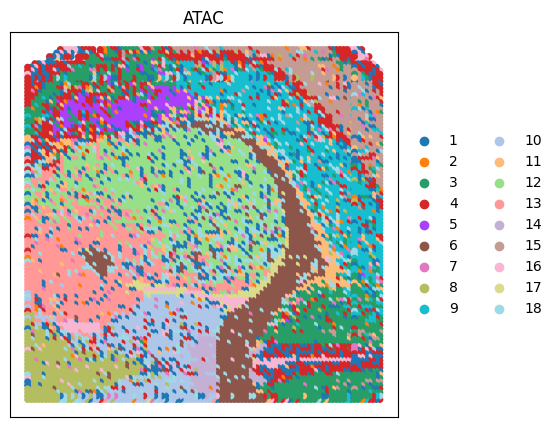

In [25]:
import matplotlib.pyplot as plt
# output_path = '/home/lixiangyu/multi-omics/MOMG/input/mouse_brain_ATAC/H3K4me3_H3K4me3.png'
fig, ax = plt.subplots(figsize=(5, 5))
sc.pl.embedding(adata_omics2, basis='spatial', color='mclust_clusters', ax=ax, title='ATAC', s=100, show=False)
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)
# plt.savefig(output_path, format='png')  
plt.show()

In [6]:
import scanpy as sc
# adata=sc.read(adata_file)
custom_colors = [
    
    '#D0D1CD',
    '#40AE91',
    '#D6608A',
    '#E8A16D',
    '#8F9D27',  
    '#49A836', 
    '#957EB2',  
    '#4D5BA0',  
    '#23A9AD', 
    '#DD5D6A',
    '#E17065',
    '#669999',
    
    '#7da494',  # Gold
    '#dba0c1',  # BlueViolet
    '#9f8db8',  # qianzi
    '#d0d08a',  # Blue
    '#abc8e5',  # molv
    '#e5a79a',  # tufen
    '#87d5c6',  # tufen
    '#ab5326',  # Blue
    '#fecbe3',  # molv
    '#fcb359',  # tufen
    '#45d5b6',  # tufen
    '#ff7f50',
    '#ffd700',
    '#aaffcb',
    '#a0522d',
    
    
]

adata.uns['RNA_colors'] = custom_colors
adata.uns['ATAC_colors'] = custom_colors
adata.uns['annotation_colors'] = custom_colors
adata.uns['SpatialGlue_colors'] = custom_colors
adata.uns['SpatialGlue_18_colors'] = custom_colors
adata.uns['no_image_colors'] = custom_colors
adata.uns['resnet_colors'] = custom_colors
adata.uns['MISO_rp_18_colors'] = custom_colors

adata.write(adata_file)

In [7]:

adata.obs['SpatialGlue_18'] = adata.obs['SpatialGlue_18'].astype('category')
adata.obs['no_image'] = adata.obs['no_image'].astype('category')
adata.obs['MISO_rp_18'] = adata.obs['MISO_rp_18'].astype('category')
#adata.obs['MISO_5'] = adata.obs['MISO_5'].astype('category')
adata.obs['RNA'] = adata.obs['RNA'].astype('category')
adata.obs['ATAC'] = adata.obs['ATAC'].astype('category')

adata.write(adata_file)

In [8]:
print(adata)

AnnData object with n_obs × n_vars = 9732 × 18165
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27me3', 'nFeature_H3K27me3', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27me3_clusters', 'n_genes', 'mclust', 'SpatialGlue_15', 'SpatialGlue_16', 'SpatialGlue_17', 'SpatialGlue_18', 'SpatialGlue_19', 'SpatialGlue_20', 'SpatialGlue_21', 'MISO_rp_15', 'MISO_rp_16', 'MISO_rp_17', 'MISO_rp_18', 'MISO_rp_19', 'MISO_rp_20', 'MISO_rp_21', 'no_image', 'RNA', 'ATAC'
    var: 'name', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'MISO_rp_18_colors', 'RNA_cluster_colors', 'SpatialGlue_18_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors', 'resnet_colors', 'umap', 'RNA_colors', 'ATAC_colors'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_lsi', 'X_pca', 'X_umap', 'adj_feature', 'alpha', 'alpha_omics

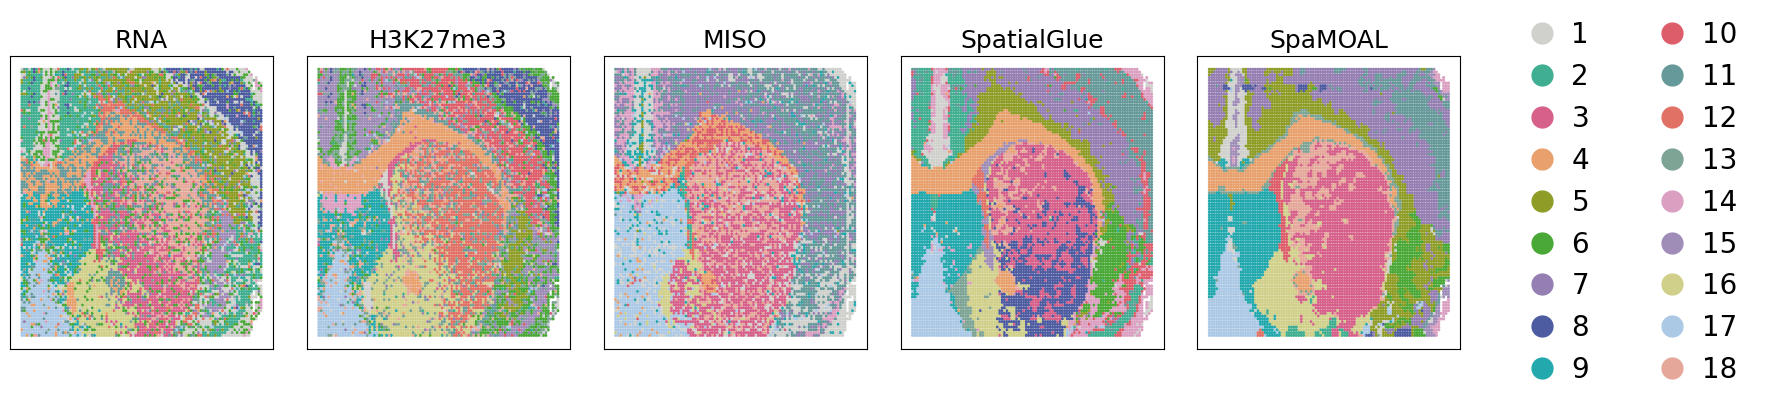

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import warnings
warnings.filterwarnings('ignore')
plt.rcParams['font.size'] = 10
warnings.filterwarnings('ignore')
adata.obsm['spatial_rotated'] = adata.obsm['spatial'].copy()
adata.obsm['spatial_rotated'][:, 0] = -adata.obsm['spatial'][:, 1]
adata.obsm['spatial_rotated'][:, 1] = adata.obsm['spatial'][:, 0]
# 创建图形和子图
fig, ax_list = plt.subplots(1, 6, figsize=(18,4))
s_size = 20
sc.pl.embedding(adata, basis='spatial_rotated', color='RNA', title='RNA', ax=ax_list[0], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='ATAC', title='H3K27me3', ax=ax_list[1], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='MISO_rp_18', title='MISO', ax=ax_list[2], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='SpatialGlue_18', title='SpatialGlue', ax=ax_list[3], s=s_size, show=False)
sc.pl.embedding(adata, basis='spatial_rotated', color='no_image', title='SpaMOAL', ax=ax_list[4], s=s_size, show=False)


# 设置子图属性
for ax in ax_list:
    ax.set_title(ax.get_title(), fontsize=18)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    # 移除现有图例
    legend = ax.get_legend()
    if legend is not None:
        legend.remove()
    # ax.invert_yaxis()
    ax.invert_xaxis()

# 定义图例颜色和标签
custom_legend = {

 '1':     '#D0D1CD',
 '2':    '#40AE91',
  '3':   '#D6608A',
  '4':   '#E8A16D',
  '5':   '#8F9D27',  
  '6':   '#49A836', 
  '7':   '#957EB2',  
  '8':   '#4D5BA0',  
  '9':   '#23A9AD', 
   '10':  '#DD5D6A',
    
  '11':   '#669999',
 '12':    '#E17065',
  
 '13':    '#7da494',  # Gold
 '14':    '#dba0c1',  # BlueViolet
 '15':    '#9f8db8',  # qianzi
 '16':    '#d0d08a',  # Blue
 '17':    '#abc8e5',  # molv
 '18':    '#e5a79a',  # tufen 
}

# 创建图例句柄
legend_elements = [
    mlines.Line2D(
        [], [], 
        color=color, 
        marker='o', 
        linestyle='None',
        markersize=15,
        label=label
    )
    for label, color in custom_legend.items()
]

# 在右侧添加图例
ax_list[5].legend(
    handles=legend_elements,
    loc='center',
    fontsize=20,
    frameon=False,
    ncol=2,
    handletextpad=0.05
)
ax_list[5].set_frame_on(False)  # 去除子图边框

plt.tight_layout(w_pad=0.8)
file_fold = "/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_ATAC/output_dmg/H3K27me3/"
plt.savefig(file_fold + 'H3K27me3_cluster_all_rotated.png', format='png', dpi=300, bbox_inches='tight')

plt.show()

In [96]:
import pandas as pd
import scanpy as sc
list_no_image=[4,7,3,13,8,11,2,5,17,18,9,10,14,1,15,16,6,12]
adata.obs['no_image']  = pd.Categorical(adata.obs['no_image'], 
                      categories=list_no_image,
                      ordered=True)
list_MISO_rp_18=[1,3,13,15,4,16,17,7,8,9,10,2,12,11,14,6,5,0]
adata.obs['MISO_rp_18']  = pd.Categorical(adata.obs['MISO_rp_18'], 
                      categories=list_MISO_rp_18,
                      ordered=True)                      
list_SpatialGlue_18=[17,2,3,8,5,6,7,4,9,10,11,12,13,14,15,16,1,18]
adata.obs['SpatialGlue_18']  = pd.Categorical(adata.obs['SpatialGlue_18'], 
                      categories=list_SpatialGlue_18,
                      ordered=True) 
# list_RNA=[4,2,10,13,5,6,17,8,12,3,11,9,18,14,16,15,7,1]
# adata.obs['RNA']  = pd.Categorical(adata.obs['RNA'], 
#                       categories=list_RNA,
#                       ordered=True) 
# list_ATAC=[16,2,17,6,5,4,7,15,10,9,12,11,1,14,3,13,8,18]
# adata.obs['ATAC']  = pd.Categorical(adata.obs['ATAC'], 
#                       categories=list_ATAC,
#                       ordered=True) 


      

In [11]:
import numpy as np
from sklearn.decomposition import PCA
from scipy.stats import ttest_ind
import scanpy as sc
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import subprocess
import time
import os
from sklearn.metrics import jaccard_score
from scipy.spatial.distance import cdist
from scipy.spatial import distance_matrix
import sys
import os
import pandas as pd
import scanpy as sc
import sys
import re
import torch
import multiprocessing
def calculate_icc(cluster_labels, data):
    unique_clusters = np.unique(cluster_labels)
    icc_values = []

    for cluster in unique_clusters:
        # 筛选出当前聚类的数据
        cluster_data = data[cluster_labels == cluster]
        # 计算当前聚类的组内方差
        within_cluster_variance = np.var(cluster_data, axis=0).mean()

        # 计算所有聚类均值
        all_cluster_means = []
        for other_cluster in unique_clusters:
            other_cluster_data = data[cluster_labels == other_cluster]
            other_cluster_mean = np.mean(other_cluster_data, axis=0)
            all_cluster_means.append(other_cluster_mean)
        all_cluster_means = np.array(all_cluster_means)
        # 计算各聚类均值之间的方差
        across_cluster_variance = np.var(all_cluster_means, axis=0).mean()

        # 计算ICC
        icc = within_cluster_variance / (within_cluster_variance + across_cluster_variance)
        icc_values.append(icc)

    return icc_values

In [12]:


num_gpus = 4
# RNA
adata_omics1=sc.read('/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27me3/rna_clean.h5ad')
adata = adata_omics1[:, adata_omics1.var.highly_variable]
sc.tl.pca(adata, n_comps=50)
pca50_rna = adata.obsm['X_pca']

data = pd.read_csv('/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27me3/H3K27me3_GeneScoreMatrix_HVG3000.csv',index_col=0)
print(data)
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.values)
pca = PCA(n_components=50)
pca50_atac = pca.fit_transform(data_scaled)
    

                  Mir1190  Mir320  Mir7115  Mir141  Mir200c  Tas2r104  \
CCGACAACAACGCTTA    1.003   0.000    0.000   0.000    0.000       0.0   
CCTAATCCGCCACATA    0.608   0.000    0.525   0.000    0.000       0.0   
AAGAGATCCGGATTGC    0.000   0.788    0.000   0.000    0.000       0.0   
GTCTGTCACCATCCTC    0.000   0.000    0.000   1.818    1.819       0.0   
CCTAATCCCAGCGTTA    0.000   0.000    0.000   0.000    0.000       0.0   
...                   ...     ...      ...     ...      ...       ...   
GCCAAGACATGCCTAA    0.000   0.000    0.000   0.000    0.000       0.0   
ACAGCAGAAAACATCG    0.000   0.000    0.000   0.000    0.000       0.0   
AAACATCGACATTGGC    0.000   0.000    0.000   0.000    0.000       0.0   
AGTGGTCACAGATCTG   80.813   0.000    0.000   0.000    0.000       0.0   
CGGATTGCAAACATCG    0.000   0.000    0.000   0.000    0.000       0.0   

                  Mir7035  Ifna6  Mir3960  Mir2861  ...  X2810013P06Rik  \
CCGACAACAACGCTTA    0.000  0.000    0.000    0.0

In [13]:
import scanpy as sc
adata_file='/home/lixiangyu/DMG/DMG-main/input/mouse_brain_SpatialGlue/H3K27me3/H3K27me3_cluster15_21.h5ad'
adata=sc.read(adata_file)
print(adata)

AnnData object with n_obs × n_vars = 9732 × 18165
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'nCount_SCT', 'nFeature_SCT', 'nCount_H3K27me3', 'nFeature_H3K27me3', 'nCount_peaks', 'nFeature_peaks', 'RNA_clusters', 'H3K27me3_clusters', 'n_genes', 'mclust', 'SpatialGlue_15', 'SpatialGlue_16', 'SpatialGlue_17', 'SpatialGlue_18', 'SpatialGlue_19', 'SpatialGlue_20', 'SpatialGlue_21', 'MISO_rp_15', 'MISO_rp_16', 'MISO_rp_17', 'MISO_rp_18', 'MISO_rp_19', 'MISO_rp_20', 'MISO_rp_21', 'no_image'
    var: 'name', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'ADT_cluster_colors', 'MISO_rp_18_colors', 'RNA_cluster_colors', 'SpatialGlue_18_colors', 'SpatialGlue_colors', 'adj_spatial', 'annotation_colors', 'hvg', 'log1p', 'neighbors', 'no_image_colors', 'resnet_colors', 'umap'
    obsm: 'SpatialGlue', 'SpatialGlue_pca', 'X_lsi', 'X_pca', 'X_umap', 'adj_feature', 'alpha', 'alpha_omics1', 'alpha_omics2', 'emb_latent_omics1', 'em

In [14]:
import pandas as pd
file_fold = "/home/lixiangyu/multi-omics/MOMG/benchmark/mouse_brain_ATAC/output_dmg/H3K27me3/"
labels_none = pd.read_csv(file_fold+'H3K27me3_0.5_0.9_0.6_10_mclust_DMG_label.csv')
a = pd.DataFrame(labels_none)
labels_none = a['cluster_result']
labels_SpatialGlue=adata.obs['SpatialGlue_18']
labels_MISO=adata.obs['MISO_rp_18']

In [15]:
print('rna')
print(calculate_icc(labels_SpatialGlue, pca50_rna), end=",")
print()
print(calculate_icc(labels_MISO, pca50_rna), end=",")
print()
print('atac')
print(calculate_icc(labels_SpatialGlue, pca50_atac), end=",")
print()
print(calculate_icc(labels_MISO, pca50_atac), end=",")
print()

rna
[0.6030651, 0.46839282, 0.4869538, 0.49786004, 0.5254451, 0.53070366, 0.5064382, 0.6736795, 0.5659018, 0.50035405, 0.96217996, 0.48489782, 0.5656173, 0.54629695, 0.80675364, 0.51913553, 0.8181293, 0.6091891],
[0.090237044, 0.10684762, 0.099170946, 0.7835802, 0.56432, 0.1377048, 0.124708325, 0.0, 0.2809919, 0.17970404, 0.40332288, 0.08874123, 0.0, 0.09718327, 0.0, 0.15898946, 0.0, 0.101254016],
atac
[0.9977884190628853, 0.9987835144489936, 0.9908246850613889, 0.9946333411490756, 0.9979363918376173, 0.9963820229735272, 0.9978386808667374, 0.9876400560817379, 0.9913186433158679, 0.9970317326098993, 0.9907139856893166, 0.9976634560116243, 0.9963717700316668, 0.9984367433095094, 0.9878426046620904, 0.996884106500475, 0.9987920798826725, 0.9876554205568103],
[0.7137601904870151, 0.8707378499225572, 0.886571224692111, 0.6539626242612577, 0.5521166849801799, 0.8229751512667828, 0.8026738618399919, 0.0, 0.9064192903387793, 0.6162388182432869, 0.6254817059120791, 0.9318831808164101, 0.0, 0.7

In [16]:
print('rna')
print(calculate_icc(labels_SpatialGlue, pca50_rna), end=",")
print()
print(calculate_icc(labels_MISO, pca50_rna), end=",")
print()
print(calculate_icc(labels_none, pca50_rna), end=",")
print()
print('atac')
print(calculate_icc(labels_SpatialGlue, pca50_atac), end=",")
print()
print(calculate_icc(labels_MISO, pca50_atac), end=",")
print()
print(calculate_icc(labels_none, pca50_atac), end=",")
print()

rna
[0.6030651, 0.46839282, 0.4869538, 0.49786004, 0.5254451, 0.53070366, 0.5064382, 0.6736795, 0.5659018, 0.50035405, 0.96217996, 0.48489782, 0.5656173, 0.54629695, 0.80675364, 0.51913553, 0.8181293, 0.6091891],
[0.090237044, 0.10684762, 0.099170946, 0.7835802, 0.56432, 0.1377048, 0.124708325, 0.0, 0.2809919, 0.17970404, 0.40332288, 0.08874123, 0.0, 0.09718327, 0.0, 0.15898946, 0.0, 0.101254016],
[0.6967401, 0.5943885, 0.55632085, 0.62218773, 0.66045517, 0.68351185, 0.6939733, 0.5996162, 0.6065176, 0.7092154, 0.62227565, 0.65643996, 0.66855234, 0.72888064, 0.88630795, 0.79348665, 0.59792066, 0.95986825],
atac
[0.9977884190628853, 0.9987835144489936, 0.9908246850613889, 0.9946333411490756, 0.9979363918376173, 0.9963820229735272, 0.9978386808667374, 0.9876400560817379, 0.9913186433158679, 0.9970317326098993, 0.9907139856893166, 0.9976634560116243, 0.9963717700316668, 0.9984367433095094, 0.9878426046620904, 0.996884106500475, 0.9987920798826725, 0.9876554205568103],
[0.7137601904870151, 

{('rna\n SpaMORL＞SpatialGlue:t=3.23(p=0.0046)\n SpaMORL＞MISO:t=3.91(p=0.0010)', 'SpatialGlue'): 0.388808409, ('rna\n SpaMORL＞SpatialGlue:t=3.23(p=0.0046)\n SpaMORL＞MISO:t=3.91(p=0.0010)', 'MISO'): 0.3313344880000001, ('rna\n SpaMORL＞SpatialGlue:t=3.23(p=0.0046)\n SpaMORL＞MISO:t=3.91(p=0.0010)', 'SpaMORL'): 0.520039136, ('atac\nSpaMORL≈SpatialGlue:t=1.683(p=0.1095)\n SpaMORL＞MISO:t=29.236(p=0.000)', 'SpatialGlue'): 0.3879916941990632, ('atac\nSpaMORL≈SpatialGlue:t=1.683(p=0.1095)\n SpaMORL＞MISO:t=29.236(p=0.000)', 'MISO'): 0.03610808154438582, ('atac\nSpaMORL≈SpatialGlue:t=1.683(p=0.1095)\n SpaMORL＞MISO:t=29.236(p=0.000)', 'SpaMORL'): 0.4378121138077494}


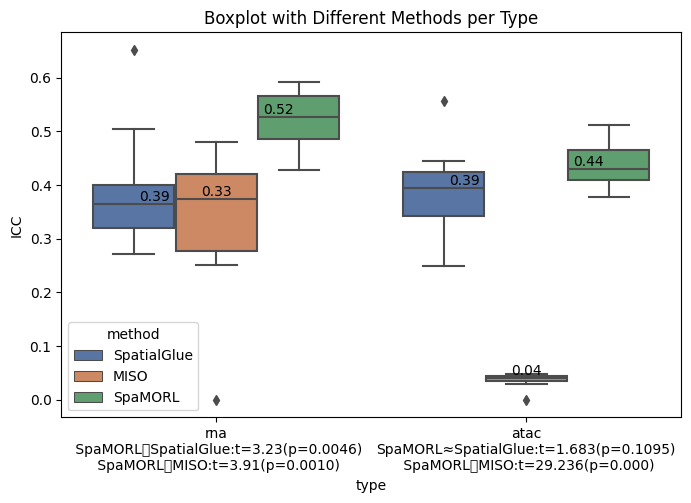

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 整理数据，将数据转换为适合绘图的格式
data_rna = [
[0.4091033, 0.6518976, 0.29601964, 0.37491345, 0.33598328, 0.36192837, 0.31562185, 0.5049361, 0.27173585, 0.36594465],
[0.44422513, 0.480842, 0.2784232, 0.27636334, 0.42368743, 0.36560488, 0.41121823, 0.0, 0.25172117, 0.3812595],
[0.4297967, 0.42893633, 0.59257734, 0.56097144, 0.5097767, 0.49487084, 0.48182157, 0.54243684, 0.5682314, 0.5909722],
]
data_atac = [

[0.4199385726511344, 0.5558030236014034, 0.34081475030005365, 0.4255091935833411, 0.4453766248835209, 0.34537366390083385, 0.24946192796702812, 0.4016455674243881, 0.3091453463060993, 0.3868482713728295],
[0.04740243457020349, 0.045146163540089504, 0.03394703469573716, 0.0299505270379519, 0.042144311986191646, 0.04094671106327427, 0.03914628492672634, 0.0, 0.0382741363249696, 0.04412321129871433],
[0.3993525536408737, 0.3784950713359475, 0.42869123807108334, 0.43183284014349643, 0.42556413575080415, 0.4420706011837066, 0.40338541440380904, 0.4720779073551158, 0.5111513761838953, 0.4855000000087625],
]

methods_rna_atac = ['SpatialGlue', 'MISO',  'SpaMORL']


# 转换为DataFrame
dfs = []
for data, data_type, methods in zip([data_rna, data_atac, data_image], 
                                     ['rna\n SpaMORL＞SpatialGlue:t=3.23(p=0.0046)\n SpaMORL＞MISO:t=3.91(p=0.0010)',
                                     'atac\nSpaMORL≈SpatialGlue:t=1.683(p=0.1095)\n SpaMORL＞MISO:t=29.236(p=0.000)'],
                                     [methods_rna_atac, methods_rna_atac]):
    for i, row in enumerate(data[:len(methods)]):
        df = pd.DataFrame({
            'type': data_type,
            'method': [methods[i]] * len(row),
            'value': row
        })
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True)

# 绘制箱线图
plt.figure(figsize=(8, 5))
ax = sns.boxplot(x='type', y='value', hue='method', data=df, palette='deep')

# 按照你要求的方式计算每组均值
grouped_mean = {}
data_rna = [
[0.4091033, 0.6518976, 0.29601964, 0.37491345, 0.33598328, 0.36192837, 0.31562185, 0.5049361, 0.27173585, 0.36594465],
[0.44422513, 0.480842, 0.2784232, 0.27636334, 0.42368743, 0.36560488, 0.41121823, 0.0, 0.25172117, 0.3812595],
[0.4297967, 0.42893633, 0.59257734, 0.56097144, 0.5097767, 0.49487084, 0.48182157, 0.54243684, 0.5682314, 0.5909722],
]
data_atac = [

[0.4199385726511344, 0.5558030236014034, 0.34081475030005365, 0.4255091935833411, 0.4453766248835209, 0.34537366390083385, 0.24946192796702812, 0.4016455674243881, 0.3091453463060993, 0.3868482713728295],
[0.04740243457020349, 0.045146163540089504, 0.03394703469573716, 0.0299505270379519, 0.042144311986191646, 0.04094671106327427, 0.03914628492672634, 0.0, 0.0382741363249696, 0.04412321129871433],
[0.3993525536408737, 0.3784950713359475, 0.42869123807108334, 0.43183284014349643, 0.42556413575080415, 0.4420706011837066, 0.40338541440380904, 0.4720779073551158, 0.5111513761838953, 0.4855000000087625],
]
methods_rna = ['SpatialGlue', 'MISO', 'SpaMORL']
methods_atac = ['SpatialGlue', 'MISO',  'SpaMORL']
grouped_mean = {}
for i, row in enumerate(data_rna):
    mean_val = sum(row) / len(row)
    category = 'rna\n SpaMORL＞SpatialGlue:t=3.23(p=0.0046)\n SpaMORL＞MISO:t=3.91(p=0.0010)'
    method = methods_rna[i]
    grouped_mean[(category, method)] = mean_val

# 计算 data_atac 的均值
for i, row in enumerate(data_atac):
    mean_val = sum(row) / len(row)
    category = 'atac\nSpaMORL≈SpatialGlue:t=1.683(p=0.1095)\n SpaMORL＞MISO:t=29.236(p=0.000)'
    method = methods_atac[i]
    grouped_mean[(category, method)] = mean_val

print(grouped_mean)
# 计算每组中位数
grouped_median = df.groupby(['type','method'])['value'].median()

# 获取x轴刻度标签和对应的位置
x_tick_labels = ax.get_xticklabels()
x_tick_positions = ax.get_xticks()

# 每个x轴刻度对应的箱子数量
num_boxes_per_tick = len(df['method'].unique())
# 箱子之间的间隔比例，可根据实际情况调整
box_spacing = 0.2
# 创建method与箱体偏移量的映射字典
method_offset_mapping = {
    'SpatialGlue': 0,
    'MISO': 1,
    'SpaMORL': 2
}

# 遍历每组均值添加文本
for  i,((category, method), mean_val) in enumerate(grouped_mean.items()):
 
  
    tick_index = list(df['type'].unique()).index(category)
    box_offset = method_offset_mapping[method] % num_boxes_per_tick

    # 计算文本的x坐标
    x = x_tick_positions[tick_index] + (box_offset - (num_boxes_per_tick - 1) / 2) * box_spacing

    # 获取当前组的中位数
    median_val = grouped_median[(category, method)]
    y = median_val 

    ax.text(x, y, f'{mean_val:.2f}', ha='center', va='bottom', fontsize=10)

plt.title('Boxplot with Different Methods per Type')
plt.ylabel('ICC')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/ICC.png', dpi=300, bbox_inches='tight')
plt.show()

In [195]:


rna_glue = data_rna[0]
rna_miso = data_rna[1]
rna_my = data_rna[2]

atac_glue = data_atac[0]
atac_miso = data_atac[1]
atac_my = data_atac[2]

t_statistic, p_value = ttest_ind(rna_my,rna_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(rna_my,rna_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_glue)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)
t_statistic, p_value = ttest_ind(atac_my,atac_miso)
print("双样本t检验的t统计量:", t_statistic)
print("双样本t检验的p值:", p_value)

双样本t检验的t统计量: 3.2312215507965427
双样本t检验的p值: 0.004633098354555692
双样本t检验的t统计量: 3.9154035750231975
双样本t检验的p值: 0.001014006707428266
双样本t检验的t统计量: 1.6835360916132573
双样本t检验的p值: 0.10953396783880291
双样本t检验的t统计量: 29.23642750744425
双样本t检验的p值: 1.2638752546458244e-16


In [36]:
import squidpy as sq

# 构建空间邻接图（Delaunay三角剖分）
sq.gr.spatial_neighbors(
    adata,
    n_neighs=6,                  # Visium建议6个邻居（六边形布局）
    coord_type="grid",           # Visium数据用"grid"，其他用"generic"
    key_added="spatial"          # 邻接矩阵存储在adata.obsp["spatial_connectivities"]
)

# 检查邻接矩阵
print(adata.obsp["spatial_connectivities"].toarray())  # 查看前5个spot的连接
import pandas as pd

# 生成聚类标签的one-hot矩阵（形状：n_spots × n_clusters）
cluster_onehot = pd.get_dummies(adata.obs["no_image"]).values
print(cluster_onehot.shape)  # 应为 (n_spots, n_clusters)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(4169, 10)


In [40]:
import scanpy as sc
import squidpy as sq
file_fold = '/home/lixiangyu/multi-omics/SpatialGLUE/rawdata/human_breast_cancer/'
adata_omics1 = sc.read_h5ad(file_fold + 'human_breast_cancer_rna.h5ad')
adata_omics2 = sc.read_h5ad(file_fold + 'human_breast_cancer_protein.h5ad')
# adata_visium=sq.datasets.visium_hne_adata()
# sq.pl.spatial_scatter(adata_visium, color=["PDK1"])
# img=sq.datasets.visium_hne_image()
# sq.pl.spatial_scatter(adata_omics1, color=["SCD"])
import anndata
import matplotlib.image as mpimg
import numpy as np
# 读取图像文件
image_path = '/home/lixiangyu/DMG/DMG-main/input/human_breast_cancer/tissue_hires_image.png'  # 替换为实际的图像文件路径
img = mpimg.imread(image_path)
library_id = 'library_1'
adata_omics1.uns['spatial'] = {
    library_id: {
        'images': {
            'hires': img  # 高分辨率图像
        },
        'scalefactors': {
            "regist_target_img_scalef": 0.25943702, 
            "tissue_hires_scalef": 0.08647901, 
            "tissue_lowres_scalef": 0.025943702, 
            "fiducial_diameter_fullres": 323.7419448316662, 
            "spot_diameter_fullres": 215.82796322111085
        },
        'metadata': {
            'source_image_path': image_path  # 图像文件的路径
        }
    }
}
sq.gr.spatial_neighbors(
    adata_omics1,
    n_neighs=6,                  # 每个Spot的邻居数（根据Visium芯片布局调整）
    coord_type="grid",        # 通用坐标类型（Visium用 "grid"）
    key_added="spatial"          # 邻接矩阵的存储键（默认即 "spatial_connectivities"）
)
assert "spatial_connectivities" in adata_omics1.obsp, "邻接矩阵未生成！"
import squidpy as sq
# 计算空间自相关（高值表示基因表达在空间上聚集）
sq.gr.spatial_autocorr(
    adata_omics1,
    genes=adata.var_names.tolist(),
    mode="moran",             # 可选 "geary"（更敏感）
    n_perms=100,              # 置换检验次数
    n_jobs=4                  # 并行计算
)


# print("Top 空间可变基因:\n", significant_svgs.head(10))
# # 选择前5个空间聚集基因
# top_genes = significant_svgs.index[:50].tolist()

# # 绘制空间表达
# sq.pl.spatial_scatter(
#     adata_omics1,
#     color=top_genes,
#     size=1.2,
#     ncols=5,
#     save="/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/image/breast_spatial_hvg.png",
# )


  0%|          | 0/100 [00:00<?, ?/s]/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/lixiangyu/anaco

In [29]:
# 打印邻接矩阵的稀疏性和平均连接数
print(f"邻接矩阵密度: {adata_omics1.obsp['spatial_connectivities'].nnz / (adata_omics1.n_obs**2):.4f}")
print(f"平均每个Spot的邻居数: {adata_omics1.obsp['spatial_connectivities'].sum(axis=1).mean()}")

邻接矩阵密度: 0.0014
平均每个Spot的邻居数: 5.792756056608299


In [37]:
print(adata_omics1)

AnnData object with n_obs × n_vars = 4169 × 15687
    var: 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'log1p', 'spatial', 'spatial_neighbors', 'moranI'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'


In [53]:
# 提取显著的空间可变基因（Moran's I > 0.2，p值 < 0.05）
svg_results = adata_omics1.uns["moranI"].sort_values("I", ascending=True)
significant_svgs = svg_results[(svg_results["I"] > 0.4) & (svg_results["pval_norm"] < 0.01)]
num_significant = len(significant_svgs)
print(f"找到了 {num_significant} 个符合条件的结果。")


找到了 475 个符合条件的结果。


In [ ]:
adata_omics2.uns["spatial"] = adata_omics1.uns["spatial"]
# 示例：可视化HER2（ERBB2）和Ki67
target_proteins = ['CD163.1', 'CR2.1', 'PCNA.1', 'VIM.1', 'KRT5.1', 'CD68.1', 'CEACAM8.1',
       'PTPRC.1', 'HLA-DRA', 'PAX5.1', 'SDC1.1', 'PTPRC.2', 'CD8A.1', 'BCL2.1',
       'mouse-IgG2a', 'mouse-IgG1k', 'mouse-IgG2bk', 'rat-IgG2a', 'CD19.1',
       'PDCD1.1', 'ACTA2.1', 'FCGR3A.1', 'ITGAX.1', 'CXCR5.1', 'EPCAM.1',
       'MS4A1.1', 'CD3E.1', 'CD14.1', 'CD40.1', 'PECAM1.1', 'CD4.1', 'ITGAM.1',
       'CD27.1', 'CCR7.1', 'CD274.1']

# 确保蛋白存在于数据中
valid_proteins = [p for p in target_proteins if p in adata_omics2.var_names]
print("可用的蛋白标记:", valid_proteins)

# 绘制空间表达
sq.pl.spatial_scatter(
    adata_omics2,
    color=valid_proteins,
    size=1.5,          # 点大小
    img=True,          # 叠加组织图像（如有）
    cmap="inferno",    # 颜色映射（适合蛋白数据）
    ncols=5,           # 每行显示3个图
    save="/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/image/protein_spatial.png"
)

In [9]:
from esda.moran import Moran
from libpysal.weights import W

# 将邻接矩阵转换为libpysal的weights对象
w = W.from_sparse(adata.obsp["spatial_connectivities"])

# 计算单个聚类（如cluster_0）的Moran's I
cluster_0 = (adata.obs["no_image"] == 1).astype(int).values
print(cluster_0)
moran = Moran(cluster_0, w, permutations=100)
print(f"Cluster 0的Moran's I: {moran.I:.3f}, p值: {moran.p_norm:.15f}")

[0 0 0 ... 0 0 1]
Cluster 0的Moran's I: 0.697, p值: 0.000000000000000


In [73]:
import scanpy as sc

# 1. 首先检查聚类标签的实际值
print("所有聚类标签:", adata.obs["SpatialGlue_10"].unique())

# 2. 对每个聚类找差异基因
sc.tl.rank_genes_groups(
    adata,
    groupby="SpatialGlue_10",
    method="wilcoxon",
    key_added="de_genes"
)

# 3. 打印每个簇的top标记基因
for cluster in adata.obs["SpatialGlue_10"].unique():
    try:
        markers = sc.get.rank_genes_groups_df(adata, group=str(cluster), key="de_genes")
        sig_markers = markers[markers["pvals_adj"] < 0.05].sort_values("logfoldchanges", ascending=False)
        
        print(f"\nCluster {cluster} 的标记基因 (Top 10):")
        print(sig_markers["names"].head(10).tolist())
    except KeyError:
        print(f"\n警告: 无法获取cluster {cluster}的差异基因，可能该簇不存在或数据不足")

所有聚类标签: [3, 5, 1, 4, 10, 2, 7, 8, 6, 9]
Categories (10, int64): [1, 2, 3, 4, ..., 7, 8, 9, 10]

Cluster 3 的标记基因 (Top 10):
['IGKC', 'IGHG1', 'FN1', 'PDK1', 'LUM', 'COL3A1', 'COL1A2', 'DCN', 'FBXW7', 'MZB1']

Cluster 5 的标记基因 (Top 10):
['AIMP1', 'WFDC2', 'AGR2', 'AGR3', 'AZGP1', 'PCSK6', 'PSME1', 'GFRA1', 'MT-CO3', 'NDUFAF6']

Cluster 1 的标记基因 (Top 10):
['SELL', 'IKZF1', 'TRBC2', 'RASGRP2', 'TRAC', 'TRAF3IP3', 'TMSB4X', 'MS4A1', 'LTB', 'AKNA']

Cluster 4 的标记基因 (Top 10):
['DHRS2', 'PDCD4', 'COX6C', 'PMAIP1', 'ELP2', 'HECTD2', 'SYNPO2', 'SLC39A6', 'PTPRK', 'RHOB']

Cluster 10 的标记基因 (Top 10):
['EXT1', 'GASK1B', 'CYB5A', 'SCD', 'NDUFAF8', 'MT-ND6', 'FASN', 'ELP2', 'FRYL', 'SRSF2']

Cluster 2 的标记基因 (Top 10):
['APOD', 'MDK', 'KRT14', 'DST', 'TACSTD2', 'SOX4', 'KRT8', 'PLAT', 'KRT17', 'PERP']

Cluster 7 的标记基因 (Top 10):
['MT-CO3', 'MT-CYB', 'MT-ATP6', 'MT-ND2', 'MT-ND3', 'MT-ND4', 'AZGP1', 'AGR2', 'TTC39A', 'MT-CO2']

Cluster 8 的标记基因 (Top 10):
['CLU', 'FDCSP', 'LRMP', 'MS4A1', 'CD22', 'CR2', 'CD79

In [ ]:
import squidpy as sq
# 示例：可视化HER2 (ERBB2) 和上皮标记 (EPCAM)
library_id = list(adata_omics1.uns["spatial"].keys())[0]
sq.pl.spatial_scatter(
    adata_omics1,
    library_key=library_id,
    color=["ERBB2", "EPCAM"],  # 可替换为其他标记物
    size=2,                 # 点大小
    img=False,                 # 显示组织图像
    figsize=(10, 4),          # 图像大小
    ncols=2,                  # 每行显示2个图
    vmin=0,                   # 表达量最小值
    vmax="99",             # 最大值设为99.9%分位数（避免异常值影响）
    cmap="magma",             # 颜色映射
    save="/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/image/breast_markers.png" 
)

In [139]:
print(adata.obsm['SpatialGlue'].shape)

(4169, 64)


In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np

print(adata.obsm['SpatialGlue'].shape)
expression_matrix = adata.obsm['SpatialGlue']
obs_index = adata.obs.index
var_index = pd.Index(range(expression_matrix.shape[1]), name='var_names')
obs_data = pd.DataFrame(index=obs_index)）
var_data = pd.DataFrame(index=var_index)
adata_SpatialGlue = sc.AnnData(
    X=expression_matrix,
    obs=obs_data,
    var=var_data
)
adata_SpatialGlue.obsm['spatial']=adata.obsm['spatial']
print(adata_SpatialGlue)
sq.gr.spatial_neighbors(
    adata_SpatialGlue,
    n_neighs=6,                  # 每个Spot的邻居数（根据Visium芯片布局调整）
    coord_type="grid",        # 通用坐标类型（Visium用 "grid"）
    key_added="spatial"          # 邻接矩阵的存储键（默认即 "spatial_connectivities"）
)
assert "spatial_connectivities" in adata_SpatialGlue.obsp, "邻接矩阵未生成！"
import squidpy as sq
# 计算空间自相关（高值表示基因表达在空间上聚集）
sq.gr.spatial_autocorr(
    adata_SpatialGlue,
    mode="moran",             # 可选 "geary"（更敏感）
    n_perms=100,              # 置换检验次数
    n_jobs=4                  # 并行计算
)
adata_SpatialGlue.write('/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/SpatialGlue_Moran.h5ad')
# 提取显著的空间可变基因（Moran's I > 0.2，p值 < 0.05）
svg_results = adata_SpatialGlue.uns["moranI"].sort_values("I", ascending=True)
significant_svgs = svg_results[(svg_results["I"] > 0.4) & (svg_results["pval_norm"] < 0.01)]
num_significant = len(significant_svgs)
print(f"找到了 {num_significant} 个符合条件的结果。")
moran_scores_SpatialGlue = adata_SpatialGlue.uns['moranI']['I'].values


(4169, 64)
AnnData object with n_obs × n_vars = 4169 × 64
    obsm: 'spatial'


In [ ]:
import scanpy as sc
import pandas as pd
import numpy as np
emb=np.load('/home/lixiangyu/multi-omics/MISO/miso/tutorial/miso_tutorial_data/human_breast_cancer/emb_rna_protein.npy')
print(emb.shape)
expression_matrix = emb
obs_index = adata.obs.index
var_index = pd.Index(range(expression_matrix.shape[1]), name='var_names')
obs_data = pd.DataFrame(index=obs_index)
var_data = pd.DataFrame(index=var_index)
adata_MISO = sc.AnnData(
    X=expression_matrix,
    obs=obs_data,
    var=var_data
)
adata_MISO.obsm['spatial']=adata.obsm['spatial']
print(adata_MISO)
sq.gr.spatial_neighbors(
    adata_MISO,
    n_neighs=6,                  # 每个Spot的邻居数（根据Visium芯片布局调整）
    coord_type="grid",        # 通用坐标类型（Visium用 "grid"）
    key_added="spatial"          # 邻接矩阵的存储键（默认即 "spatial_connectivities"）
)
assert "spatial_connectivities" in adata_MISO.obsp, "邻接矩阵未生成！"
import squidpy as sq
# 计算空间自相关（高值表示基因表达在空间上聚集）
sq.gr.spatial_autocorr(
    adata_MISO,
    mode="moran",             # 可选 "geary"（更敏感）
    n_perms=100,              # 置换检验次数
    n_jobs=4                  # 并行计算
)
adata_MISO.write('/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/MISO_Moran.h5ad')
# 提取显著的空间可变基因（Moran's I > 0.2，p值 < 0.05）
svg_results = adata_MISO.uns["moranI"].sort_values("I", ascending=True)
significant_svgs = svg_results[(svg_results["I"] > 0.4) & (svg_results["pval_norm"] < 0.01)]
num_significant = len(significant_svgs)
print(f"找到了 {num_significant} 个符合条件的结果。")
moran_scores_MISO = adata_MISO.uns['moranI']['I'].values

(4169, 96)
AnnData object with n_obs × n_vars = 4169 × 96
    obsm: 'spatial'


  0%|          | 0/100 [00:00<?, ?/s]/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
  1%|          | 1/100 [00:10<18:00, 10.91s/]/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
 

In [166]:
moran_scores_MISO = adata_MISO.uns['moranI']['I'].values
moran_scores_SpatialGlue = adata_SpatialGlue.uns['moranI']['I'].values
moran_scores_SpaMORL = adata_SpaMORL.uns['moranI']['I'].values

In [175]:
import scanpy as sc
import pandas as pd
import numpy as np
embedding=pd.read_csv("/home/lixiangyu/DMG/DMG-main/benchmark/human_breast_cancer/output_dmg/none_0.5_none/none_human_breast_cancer_0.7_1.0_0.5_10_mclust_DMG_embedding.csv",index_col=0)
print(embedding.shape)
expression_matrix = embedding.values
obs_index = adata.obs.index
var_index = pd.Index(range(expression_matrix.shape[1]), name='var_names')
obs_data = pd.DataFrame(index=obs_index)
var_data = pd.DataFrame(index=var_index)
adata_SpaMORL = sc.AnnData(
    X=expression_matrix,
    obs=obs_data,
    var=var_data
)
adata_SpaMORL.obsm['spatial']=adata.obsm['spatial']
print(adata_SpaMORL)
sq.gr.spatial_neighbors(
    adata_SpaMORL,
    n_neighs=6,                  # 每个Spot的邻居数（根据Visium芯片布局调整）
    coord_type="grid",        # 通用坐标类型（Visium用 "grid"）
    key_added="spatial"          # 邻接矩阵的存储键（默认即 "spatial_connectivities"）
)
assert "spatial_connectivities" in adata_SpaMORL.obsp, "邻接矩阵未生成！"
import squidpy as sq
# 计算空间自相关（高值表示基因表达在空间上聚集）
sq.gr.spatial_autocorr(
    adata_SpaMORL,
    mode="moran",             # 可选 "geary"（更敏感）
    n_perms=100,              # 置换检验次数
    n_jobs=4                  # 并行计算
)
adata_SpaMORL.write('/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/SpaMORL_Moran.h5ad')
# 提取显著的空间可变基因（Moran's I > 0.2，p值 < 0.05）
svg_results = adata_SpaMORL.uns["moranI"].sort_values("I", ascending=True)
significant_svgs = svg_results[(svg_results["I"] > 0.4) & (svg_results["pval_norm"] < 0.01)]
num_significant = len(significant_svgs)
print(f"找到了 {num_significant} 个符合条件的结果。")
moran_scores_SpaMORL = adata_SpaMORL.uns['moranI']['I'].values

(4169, 12)
AnnData object with n_obs × n_vars = 4169 × 12
    obsm: 'spatial'


  0%|          | 0/100 [00:00<?, ?/s]/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
  1%|          | 1/100 [00:10<17:40, 10.71s/]/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION = 12050. The TBB threading layer is disabled.
  warnings.warn(problem)
 48%|████▊     | 48/100 [00:10<00:08,  6.28/s]/home/lixiangyu/anaconda3/envs/dmg/lib/python3.9/site-packages/numba/np/ufunc/parallel.py:371: NumbaWarning: The TBB threading layer requires TBB version 2021 update 6 or later i.e., TBB_INTERFACE_VERSION >= 12060. Found TBB_INTERFACE_VERSION =

找到了 12 个符合条件的结果。


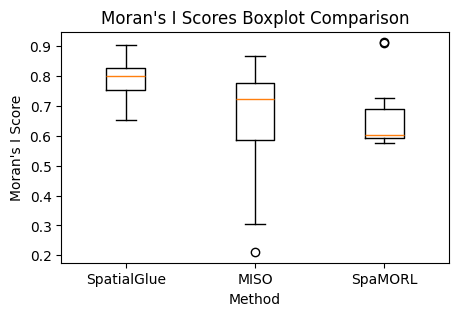

In [176]:
import matplotlib.pyplot as plt
import numpy as np


# 将数据整理成一个列表，每个元素是一个数据集
data = [moran_scores_SpatialGlue, moran_scores_MISO, moran_scores_SpaMORL]

# 定义每个箱子的标签
labels = [ 'SpatialGlue', 'MISO', 'SpaMORL']

# 创建箱线图
plt.figure(figsize=(5, 3))
plt.boxplot(data, labels=labels)

# 添加标题和轴标签
plt.title('Moran\'s I Scores Boxplot Comparison')
plt.xlabel('Method')
plt.ylabel('Moran\'s I Score')
plt.savefig('/home/lixiangyu/multi-omics/MOMG/input/human_breast_cancer/moran.png')
# 显示图形
plt.show()

In [165]:
print(moran_scores_SpaMORL)
print(moran_scores_SpatialGlue)
print(moran_scores_MISO)

[Ellipsis]
[Ellipsis]
[Ellipsis]
